This jupyter notebook shows how to use Fortuna to fit a simple model $f_\theta(x)$ over a dataset $\{x_k, y_k\}_1^N$.  

#### The model:
$f_\theta(x) = ax + c = \hat{y}$  
$a,c \in \theta$


#### The data:
D = [(0.5, -3.25), (1.0, -9.99), (4.0, 11.09), (4.1, 21.74), (4.2, 11.07), (6.0, 44.32), (7.0, 76.5), (9.1, 127.73)]

#### The data is generated using the following function:
$y = (1.5 * x^2) - 3.4 + \epsilon$  
$\epsilon \sim N(0, 10)$


#### Things you might want to try:
1) Change: N, the loss type
2) Change it so that 

In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np


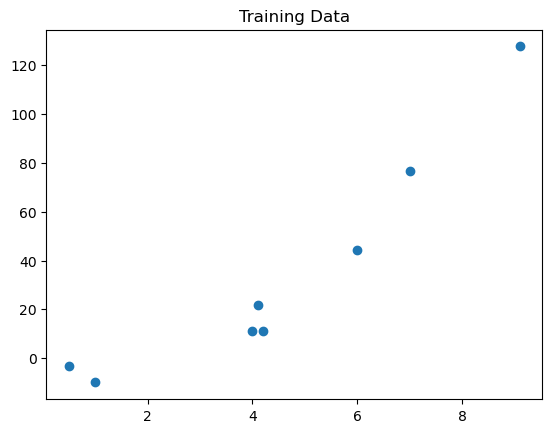

In [2]:
#
# Plot the data
#


xs = [0.5, 1.0, 4.0, 4.1, 4.2, 6.0, 7.0, 9.1]
ys = [-3.25, -9.99, 11.09, 21.74, 11.07, 44.32, 76.5, 127.73]

plt.scatter(xs, ys)
plt.title("Training Data")
plt.show()


In [3]:

def f(x, theta):
    """Our model: f(x) = a*x + c = y_hat
    
    We want to find the theta that makes this function best (acording to our loss) describe the data.
    """
    a, c = theta
    y_hat = a*x + c
    
    return y_hat
    
    
# example:
theta = (1.5, 5) # a=1.5, c=5
x = 5
y_hat = f(x, theta) # y_hat = (5*1.5) + 5

print("f({}) = {}".format(x, y_hat))



f(5) = 12.5


In [4]:

def loss_function(ys, ys_hat, loss_type):
    
    loss = 0.0
    
    if loss_type == "L2":    
        for y, y_hat in zip(ys, ys_hat):
            loss += (y - y_hat)**2
            
    elif loss_type == "L1":
        for y, y_hat in zip(ys, ys_hat):
            loss += abs(y - y_hat)  # abs() is the absolute value
            
    
    return loss
            

best loss we found was: 1993.05
f(x) = -41.59*x + -20.61


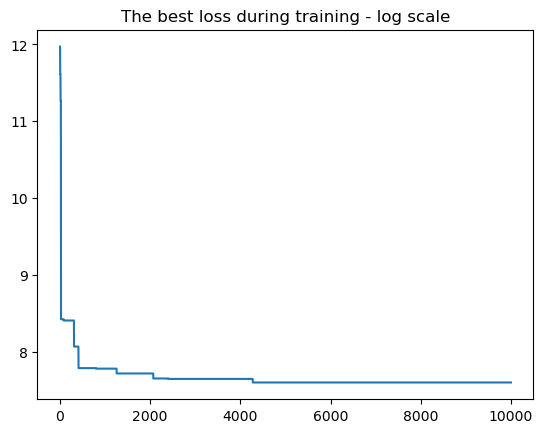

In [5]:

#
# Fortuna main code
#

N = 10000 # number of iterations

best_loss = float('inf')
best_theta = None

best_loss_log = []

for n in range(N):
    
    # guess parameters: theta
    # a ~ U(-100, 100)
    # c ~ U(-100, 100)
    a = random.uniform(-100, 100)
    c = random.uniform(-100, 100)
    theta = (a,c)
    
    #
    # Calculate what points our model guesses
    # y_hat = f(x_k, theta)
    #
    ys_hat = []
    for x in xs:
        y_hat = f(x, theta)
        ys_hat.append(y_hat)
        
    # get the loss
    loss = loss_function(ys, ys_hat, "L2")
    
    # if the loss is lower (the model is better) keep it, else guess a new version
    if loss < best_loss:
        best_loss = loss
        best_theta = theta
        
    best_loss_log.append(best_loss)
    
    
print("best loss we found was: {:.2f}".format(best_loss))
print("f(x) = {:.2f}*x + {:.2f}".format(theta[0], theta[1]))
    


plt.plot(np.log(best_loss_log))
plt.title("The best loss during training - log scale")
plt.show()

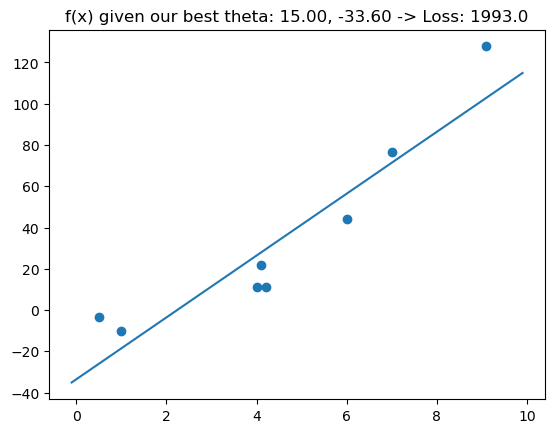

In [7]:



xs_predict = np.arange(-0.1, 10, 0.1)
ys_predict = []

for x in xs_predict:
    y_hat = f(x, best_theta)
    ys_predict.append(y_hat)


plt.plot(xs_predict, ys_predict)
plt.scatter(xs, ys)

plt.title("f(x) given our best theta: {:.2f}, {:.2f} -> Loss: {:.1f}".format(best_theta[0], best_theta[1], best_loss))
plt.show()

